# Multi Layer Perceptron (MLP)

In the last notebook, the Scikit-Learn MLP will be implemented and tested in the dev set. Then, after loading the trained traditional model (RandomForest), I´ll compare the results and choose the best model of all.

Finally, some appointments will be done, exposing the conclussions and some points that should be checked in a deeper analysis.


In [60]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import joblib
from time import sleep

In [61]:
# Load data splits
X_dev = pd.read_csv('datasets/iris_data_splits/x_dev.csv')
y_dev = pd.read_csv('datasets/iris_data_splits/y_dev.csv')
X_test = pd.read_csv('datasets/iris_data_splits/x_test.csv')
y_test = pd.read_csv('datasets/iris_data_splits/y_test.csv')
X_train = pd.read_csv('datasets/iris_data_splits/x_train.csv')
y_train = pd.read_csv('datasets/iris_data_splits/y_train.csv')
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [62]:
# Load saved RF model
rf_model = joblib.load('models/optimized_random_forest.joblib')

In [63]:
# Assuring the partitions are vectors (important for efficiency to apply vectorization)
y_train = y_train.values.ravel()
y_dev = y_dev.values.ravel()


# MLP Definition

``**Disclaimer**: the next implementation and functions have been worked on the Deep Learning Specialization I´m doing. This wasn´t taught in the previous subjects with this amount of detail. However, I think that it´s a good idea to try to implement these concepts I learnt in a different dataset and environment.``

## Adam Optimizer and L2 Regularization  

### Adam Optimizer  
Adam (**Adaptive Moment Estimation**) is an optimization algorithm that combines the advantages of **Momentum** and **RMSProp**, adapting the learning rate for each parameter.  

#### Why use Adam?  
- **Faster convergence** compared to standard SGD.  
- **Adaptive learning rates** for different parameters.  
- Works well in non-stationary problems and with sparse gradients.  

### L2 Regularization (Weight Decay)  
L2 regularization, also called **weight decay**, adds a penalty term to the loss function to prevent overfitting. The modified loss function is:  

$L'(\theta) = L(\theta) + \frac{\lambda}{2} \sum_{i} \theta_i^2$


where:  
- $L(\theta)$ is the original loss function.  
- $(\lambda)$ (regularization strength) controls the impact of weight decay.  
- $( \theta_i)$ are the model parameters.  

#### Why use L2 regularization?  
- **Reduces overfitting** by shrinking weights towards zero.  
- **Encourages generalization**, making the model less sensitive to noise.  
- **Prevents large weights**, leading to smoother decision boundaries.  



In [64]:
def train_with_progress(mlp, X_train, y_train, X_dev, y_dev):
    losses = []
    accuracies = []
    
    for i in range(1, mlp.max_iter + 1):
        mlp.partial_fit(X_train, y_train, classes=[0, 1, 2])  # Training one epoch

        # Storing loss and accuracy on dev 
        losses.append(mlp.loss_)
        acc = mlp.score(X_dev, y_dev)
        accuracies.append(acc)

        # Show every 10 epochs the loss and accuracy
        if i % 10 == 0:
            print(f"Epoch {i}/{mlp.max_iter} - Loss: {mlp.loss_:.4f} - Accuracy: {acc:.4f}")
            sleep(0.1)  # Small pause to avoid showing the training so fast
    
    return mlp, losses, accuracies


In [65]:
def plot_learning_curves(losses, accuracies):
    plt.figure(figsize=(12, 5))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(losses, label="Loss", color="red")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label="Accuracy", color="blue")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend()

    plt.show()


In [66]:
# MLP Definition
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),  # 3 hidden layers with that number of neurons
                    activation='relu', # Activation function in each layer 
                    solver='adam',  # Adam optimizer
                    alpha=0.0001,  # L2 Default Regularization 
                    max_iter=500,  # Epoch Number 
                    random_state=42,
                    warm_start=True)

In [67]:
# Training and obtaining loss and accuracy score during training
mlp, losses, accuracies = train_with_progress(mlp, X_train, y_train, X_dev, y_dev)



Epoch 10/500 - Loss: 0.7580 - Accuracy: 0.7727
Epoch 20/500 - Loss: 0.4933 - Accuracy: 0.8636
Epoch 30/500 - Loss: 0.3210 - Accuracy: 0.8636
Epoch 40/500 - Loss: 0.2241 - Accuracy: 0.8636
Epoch 50/500 - Loss: 0.1586 - Accuracy: 0.8636
Epoch 60/500 - Loss: 0.1095 - Accuracy: 0.8636
Epoch 70/500 - Loss: 0.0772 - Accuracy: 0.8636
Epoch 80/500 - Loss: 0.0573 - Accuracy: 0.8636
Epoch 90/500 - Loss: 0.0450 - Accuracy: 0.8636
Epoch 100/500 - Loss: 0.0365 - Accuracy: 0.8636
Epoch 110/500 - Loss: 0.0303 - Accuracy: 0.8636
Epoch 120/500 - Loss: 0.0256 - Accuracy: 0.8636
Epoch 130/500 - Loss: 0.0217 - Accuracy: 0.8636
Epoch 140/500 - Loss: 0.0185 - Accuracy: 0.9091
Epoch 150/500 - Loss: 0.0159 - Accuracy: 0.9091
Epoch 160/500 - Loss: 0.0136 - Accuracy: 0.9091
Epoch 170/500 - Loss: 0.0117 - Accuracy: 0.9091
Epoch 180/500 - Loss: 0.0099 - Accuracy: 0.9091
Epoch 190/500 - Loss: 0.0084 - Accuracy: 0.9091
Epoch 200/500 - Loss: 0.0070 - Accuracy: 0.9091
Epoch 210/500 - Loss: 0.0058 - Accuracy: 0.9091
E

This MLP has 5 layers:
 - 1 input layer with 4 neurons (iris dataset has 4 features)
 - 3 hidden layers, with 128, 64 and 32 neurons.
 - 1 output layer, with 3 neurons, because it´s classifying 3 classes


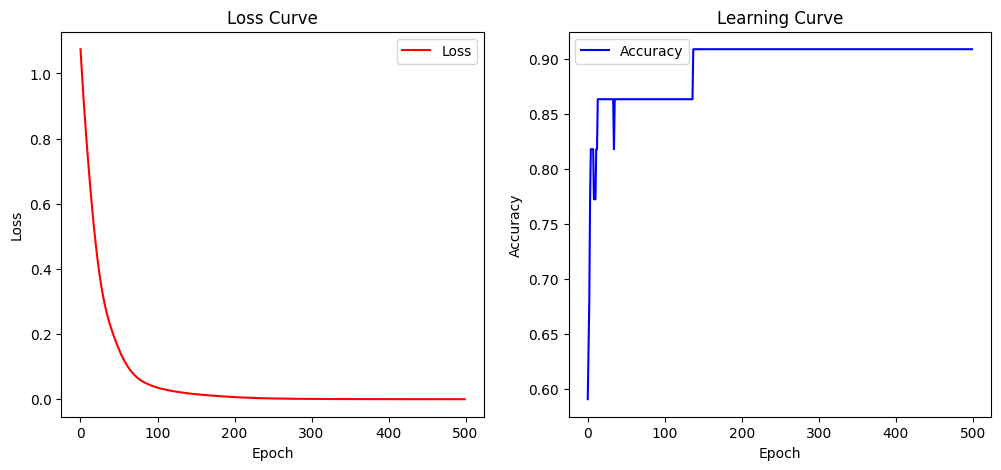

In [68]:
# Plotting results
plot_learning_curves(losses, accuracies)

## Conclussions

### Fast loss convergence

1. Loss decay pretty fast, specially in the first 100 epochs-
2. After 200 epoch, loss is almost cero.
3. Then, the model is learning well tranining data, but also can be a sympton of overfitting.

### Accuracy blocked on 0.9091
 - Since epoch 140, accuracy doesn´t improve in validation data.
 - The model has learnt all that it can from current data and architecture.


### Next Steps
- Reducing epoch numbers to 200.
- In other implementations, dropout should be enabled.
- Adjust learning rate with Adam. For example, changing it to 0.01
- Adjust number of layers or size.
- Train with more data for better generalization.
- Adaptative learning rate: learning rate is automatically updated while the model starts converging.

In [69]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), 
                    activation='relu',
                    alpha=0.01, 
                    solver='adam', 
                    max_iter=250,
                    learning_rate='adaptive',
                    random_state=42,
                    learning_rate_init=0.001,
                    warm_start=True)


In [70]:
# Training and obtaining loss and accuracies scores.
mlp, losses, accuracies = train_with_progress(mlp, X_train, y_train, X_dev, y_dev)



Epoch 10/250 - Loss: 0.7645 - Accuracy: 0.7727
Epoch 20/250 - Loss: 0.4998 - Accuracy: 0.8636
Epoch 30/250 - Loss: 0.3276 - Accuracy: 0.8636
Epoch 40/250 - Loss: 0.2306 - Accuracy: 0.8636
Epoch 50/250 - Loss: 0.1651 - Accuracy: 0.8636
Epoch 60/250 - Loss: 0.1159 - Accuracy: 0.8636
Epoch 70/250 - Loss: 0.0837 - Accuracy: 0.8636
Epoch 80/250 - Loss: 0.0638 - Accuracy: 0.8636
Epoch 90/250 - Loss: 0.0516 - Accuracy: 0.8636
Epoch 100/250 - Loss: 0.0431 - Accuracy: 0.8636
Epoch 110/250 - Loss: 0.0369 - Accuracy: 0.8636
Epoch 120/250 - Loss: 0.0322 - Accuracy: 0.8636
Epoch 130/250 - Loss: 0.0284 - Accuracy: 0.8636
Epoch 140/250 - Loss: 0.0252 - Accuracy: 0.9091
Epoch 150/250 - Loss: 0.0225 - Accuracy: 0.9091
Epoch 160/250 - Loss: 0.0201 - Accuracy: 0.9091
Epoch 170/250 - Loss: 0.0181 - Accuracy: 0.9091
Epoch 180/250 - Loss: 0.0164 - Accuracy: 0.9091
Epoch 190/250 - Loss: 0.0149 - Accuracy: 0.9091
Epoch 200/250 - Loss: 0.0137 - Accuracy: 0.9091
Epoch 210/250 - Loss: 0.0127 - Accuracy: 0.9091
E

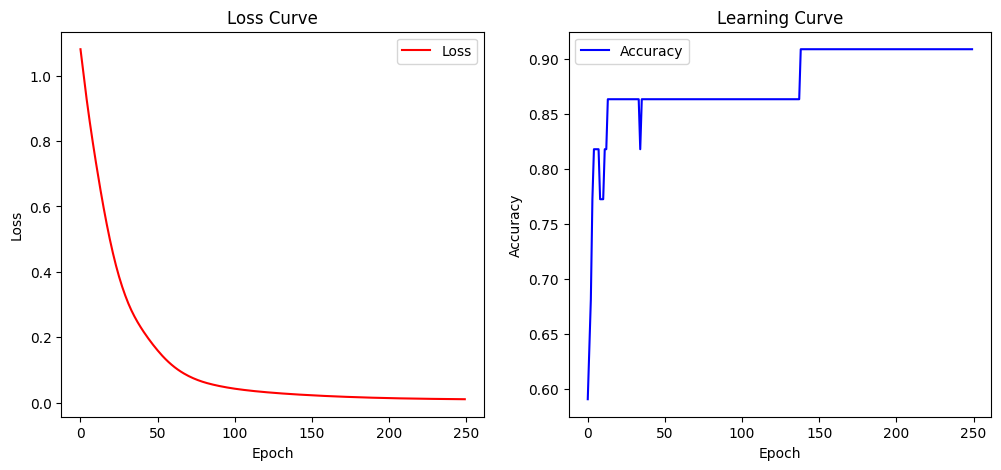

In [71]:
# Plotting results
plot_learning_curves(losses, accuracies)

## Conclussions

- Satisfactory training: model now improves constantly, not decaying too fast and reaching 90.91% precission.
- Saturation point in epoch 140: this model can´t learn anymore with its architecture or the data.

Therefore, it will be advisable to change the architecture or make a deeper research on the correct learning rates, size and number of layers, applying cross-validation, etc.

Finally, we´ll pass this model to the train set and compare it with rf.


In [72]:
# Evaluate on validation
dev_accuracy = mlp.score(X_dev, y_dev)
print(f"Accuracy on dev set: {dev_accuracy:.4f}")

# Evaluate on test
test_accuracy = mlp.score(X_test, y_test)
print(f"Accuracy on test set (MLP): {test_accuracy:.4f}")


# Evaluate the saved Random Forest model on the test set
test_accuracy_rf = rf_model.score(X_test, y_test)
print(f"Accuracy on test set (Random Forest): {test_accuracy_rf:.4f}")


Accuracy on dev set: 0.9091
Accuracy on test set (MLP): 0.9565
Accuracy on test set (Random Forest): 0.9565


# Final Conclussions

## Performance 
The MLP is performing well on both the validation (dev) and test sets, with an accuracy of 90.91% on the dev set and 95.65% on the test set. 

This suggests that the model generalizes well to new, unseen data and is not overfitting. The higher test accuracy indicates it is likely making good predictions on the test data.

Therefore, the MLP has an excellent performance, avoiding overfitting and generalizing well on test data.

## Comparison

Both Random Forest and MLP have the same accuracy score. Then, some other metrics should be taken into consideration, like f1-score, mean squared error, etc.

However, since in the last notebook I saw that RandomForest had a tendency to overfitting, I believe **the best option for this dataset would be MLP**.

## Why MLP?

Although they have the same score, MLP has more features to adjust and work with than RandomForest. Moreover, MLP doesn´t seem to overfit the data and its only problem is its saturation point, that could be provoked by dataset´s nature.

In conclussion, **MLP seeems to be the best option**, because there is no overfitting, performance on test data is excellent and there are more ways of keeping track of its training and ajusting its parameters.

Finally, I´ll persist the model and store it in the `models` folder.


In [73]:
from pathlib import Path

# Create models directory if it doesn't exist
Path('models').mkdir(exist_ok=True)

# Save optimized Random Forest model
joblib.dump(mlp, 'models/mlp.joblib')

# Quick load test to verify
loaded_model = joblib.load('models/mlp.joblib')
print(f"Model saved successfully. Test accuracy: {loaded_model.score(X_test, y_test):.4f}")

Model saved successfully. Test accuracy: 0.9565
